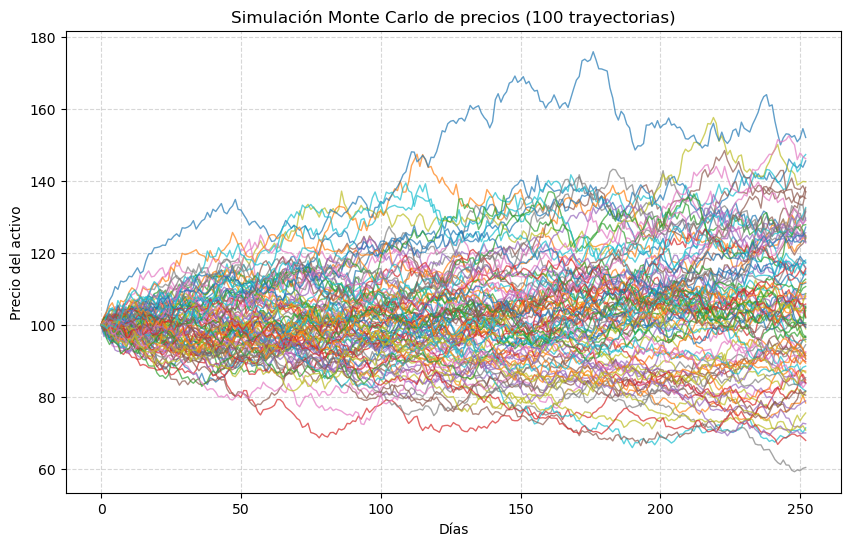

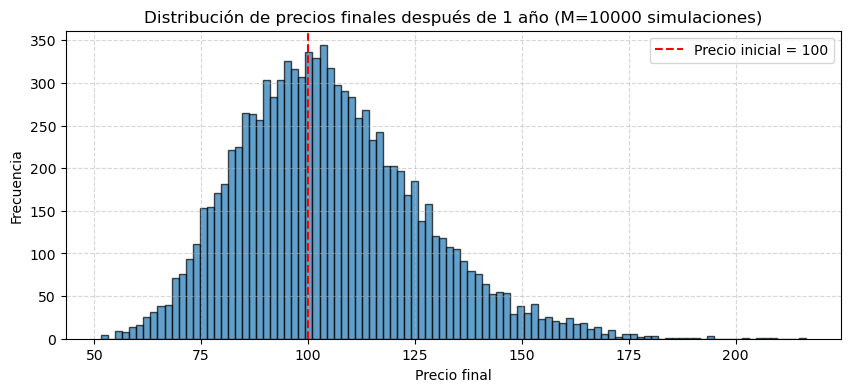


--- NIVEL DE CONFIANZA 95% ---
VaR: 25.83%
Expected Shortfall (CVaR): 31.64%

--- NIVEL DE CONFIANZA 99% ---
VaR: 35.59%
Expected Shortfall (CVaR): 39.46%

--- INTERPRETACIÓN PARA EL NEGOCIO ---
El VaR (Valor en Riesgo) indica la pérdida máxima esperada en un horizonte de 1 año
bajo condiciones normales de mercado, con un cierto nivel de confianza.
Por ejemplo, un VaR del 95% del X% significa que, con un 95% de confianza, la pérdida
no superará ese porcentaje. El 5% restante podrían ser pérdidas mayores.
El Expected Shortfall (o CVaR) mide la pérdida promedio en esos escenarios extremos.
Estas métricas son fundamentales para la gestión de riesgos y cumplimiento regulatorio (Basilea).


In [1]:
# ============================================
# SIMULACIÓN MONTE CARLO PARA ESTIMAR RIESGO
# Aplicado a un activo financiero (ej. acción)
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fijar semilla para reproducibilidad
np.random.seed(42)

# --------------------------------------------
# Parámetros del activo y simulación
# --------------------------------------------
S0 = 100          # Precio inicial del activo (ej. 100 €)
mu = 0.05         # Retorno esperado anual (5%)
sigma = 0.20      # Volatilidad anual (20%)
T = 1             # Horizonte temporal en años (1 año)
N = 252           # Número de pasos de tiempo (días hábiles)
dt = T/N          # Delta t (fracción de año por paso)

# Parámetros de la simulación Monte Carlo
M = 10000         # Número de simulaciones (trayectorias)

# --------------------------------------------
# Simulación de trayectorias con GBM
# --------------------------------------------
# Creamos una matriz de M x N (cada fila es una simulación, cada columna un paso de tiempo)
# Inicializamos con el precio inicial S0 en el tiempo 0 (columna 0)
S = np.zeros((M, N+1))
S[:, 0] = S0

# Generamos los incrementos aleatorios: para cada paso, M números normales N(0,1)
for t in range(1, N+1):
    # GBM: S(t) = S(t-1) * exp((mu - 0.5*sigma^2)*dt + sigma * sqrt(dt) * Z)
    Z = np.random.normal(0, 1, M)                # Vector de M shocks aleatorios
    S[:, t] = S[:, t-1] * np.exp((mu - 0.5*sigma**2)*dt + sigma * np.sqrt(dt) * Z)

# S tiene dimensiones (M, N+1). La última columna (t=N) es el precio al final del año.
precios_finales = S[:, -1]

# --------------------------------------------
# Visualización de las primeras 100 trayectorias
# --------------------------------------------
plt.figure(figsize=(10,6))
plt.plot(S[:100].T, linewidth=1, alpha=0.7)
plt.title('Simulación Monte Carlo de precios (100 trayectorias)')
plt.xlabel('Días')
plt.ylabel('Precio del activo')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# --------------------------------------------
# Distribución de precios finales
# --------------------------------------------
plt.figure(figsize=(10,4))
plt.hist(precios_finales, bins=100, edgecolor='black', alpha=0.7)
plt.title(f'Distribución de precios finales después de {T} año (M={M} simulaciones)')
plt.xlabel('Precio final')
plt.ylabel('Frecuencia')
plt.axvline(S0, color='red', linestyle='--', label=f'Precio inicial = {S0}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# --------------------------------------------
# Cálculo de métricas de riesgo: VaR y Expected Shortfall
# --------------------------------------------
# Supongamos que tenemos una posición larga (comprada) de 1 unidad del activo.
# La pérdida (en valor absoluto) respecto al precio inicial es: pérdida = S0 - precio_final (si precio_final < S0)
# Pero en finanzas el VaR se define sobre la distribución de pérdidas y ganancias (P&L).
# Vamos a calcular el retorno simple: ret = (precio_final - S0) / S0
retornos = (precios_finales - S0) / S0

# Ordenamos los retornos para calcular percentiles
retornos_ordenados = np.sort(retornos)

# Niveles de confianza
confianzas = [0.95, 0.99]

for conf in confianzas:
    # VaR es la pérdida máxima esperada en condiciones normales con nivel de confianza conf.
    # Es el percentil (1-conf) de la distribución de pérdidas (cola izquierda).
    # Como los retornos negativos son pérdidas, tomamos el percentil bajo.
    var_index = int((1 - conf) * M)   # Índice para el percentil (1-conf)
    var = -retornos_ordenados[var_index] * 100   # Multiplicamos por 100 para expresarlo en %
    
    # Expected Shortfall (ES) o CVaR: promedio de los retornos que superan el VaR
    es = -np.mean(retornos_ordenados[:var_index]) * 100
    
    print(f'\n--- NIVEL DE CONFIANZA {conf*100:.0f}% ---')
    print(f'VaR: {var:.2f}%')
    print(f'Expected Shortfall (CVaR): {es:.2f}%')

# --------------------------------------------
# Interpretación en lenguaje de negocio
# --------------------------------------------
print("\n--- INTERPRETACIÓN PARA EL NEGOCIO ---")
print("El VaR (Valor en Riesgo) indica la pérdida máxima esperada en un horizonte de 1 año")
print("bajo condiciones normales de mercado, con un cierto nivel de confianza.")
print("Por ejemplo, un VaR del 95% del X% significa que, con un 95% de confianza, la pérdida")
print("no superará ese porcentaje. El 5% restante podrían ser pérdidas mayores.")
print("El Expected Shortfall (o CVaR) mide la pérdida promedio en esos escenarios extremos.")
print("Estas métricas son fundamentales para la gestión de riesgos y cumplimiento regulatorio (Basilea).")